In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [13]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_validate, y_train, y_validate = train_test_split(X, y)

In [14]:
# scalar = MinMaxScaler()
# train_x_01 = scalar.fit(train_x)
# test_x_01 = scalar.fit(test_x)

train_x_01 = X_train/255
validate_x_01 = X_validate/255

# reduzir tamanho da image

model = Sequential()
model.add(layers.Dense(1000, input_dim=2500, activation="relu"))
model.add(layers.Dense(1000, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(train_x_01, y_train, epochs=20, verbose=0)

BACC = 80.26988026988026


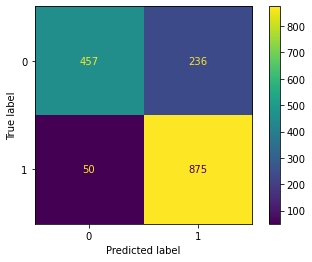

In [23]:
# y_hat = np.argmax(model.predict(test_x_01), axis=1)
y_hat = (model.predict(validate_x_01) > 0.5).astype("int32")
bacc = balanced_accuracy_score(y_validate, y_hat)

cm = confusion_matrix(y_validate, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")